Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn import preprocessing # Import label encoder 
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 7.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.36
    Uninstalling Cython-0.29.36:
      Successfully uninstalled Cython-0.29.36
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hdbscan 0.8.33 requires cython<3,>=0.27, but you have cython 3.0.11 which is incompatible.


**Jumping to final merged data -FIRMS and ACLED data**


In [4]:
gdf_acfi = pd.read_csv("gdf_post_zscore_conflict.csv", encoding = "latin1")

In [5]:
gdf_acfi.head()

,Unnamed: 0,grid_id,year,fireCount,acled_count,acled_event_ids,geometry,log_fireCount,log_acled_count,acled_binary,zscore,conflict_fire
0,0,"48,28",2000,0,0,[],POLYGON ((21.559566818868515 12.57641397767330...,0.0000,0.0000,0,-1.1279,0
1,1,"48,28",2001,2,0,[],POLYGON ((21.559566818868515 12.57641397767330...,1.0986,0.0000,0,-0.3172,0
2,2,"48,28",2002,1,0,[],POLYGON ((21.559566818868515 12.57641397767330...,0.6931,0.0000,0,-0.7225,0
3,3,"48,28",2003,7,2,"[SUD1707, SUD1707]",POLYGON ((21.559566818868515 12.57641397767330...,2.0794,1.0986,1,1.7094,2
4,4,"48,28",2004,9,0,[],POLYGON ((21.559566818868515 12.57641397767330...,2.3026,0.0000,0,2.5200,4


In [6]:
gdf_acfi = gdf_acfi.drop(columns = ['Unnamed: 0'])

In [7]:
gdf_acfi.head()

,grid_id,year,fireCount,acled_count,acled_event_ids,geometry,log_fireCount,log_acled_count,acled_binary,zscore,conflict_fire
0,"48,28",2000,0,0,[],POLYGON ((21.559566818868515 12.57641397767330...,0.0000,0.0000,0,-1.1279,0
1,"48,28",2001,2,0,[],POLYGON ((21.559566818868515 12.57641397767330...,1.0986,0.0000,0,-0.3172,0
2,"48,28",2002,1,0,[],POLYGON ((21.559566818868515 12.57641397767330...,0.6931,0.0000,0,-0.7225,0
3,"48,28",2003,7,2,"[SUD1707, SUD1707]",POLYGON ((21.559566818868515 12.57641397767330...,2.0794,1.0986,1,1.7094,2
4,"48,28",2004,9,0,[],POLYGON ((21.559566818868515 12.57641397767330...,2.3026,0.0000,0,2.5200,4


In [8]:
gdf_acfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grid_id          20400 non-null  object 
 1   year             20400 non-null  int64  
 2   fireCount        20400 non-null  int64  
 3   acled_count      20400 non-null  int64  
 4   acled_event_ids  20400 non-null  object 
 5   geometry         20400 non-null  object 
 6   log_fireCount    20400 non-null  float64
 7   log_acled_count  20400 non-null  float64
 8   acled_binary     20400 non-null  int64  
 9   zscore           20400 non-null  float64
 10  conflict_fire    20400 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.7+ MB


# Panel Regression - from Datascience article
https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8

## Adding Log Columns

In [9]:
# Take the log of fireCount and acled_count
gdf_acfi['log_fireCount'] = np.log(gdf_acfi['conflict_fire']+1)
gdf_acfi['log_acled_count'] = np.log(gdf_acfi['acled_count']+1)

In [10]:
gdf_acfi.head()

,grid_id,year,fireCount,acled_count,acled_event_ids,geometry,log_fireCount,log_acled_count,acled_binary,zscore,conflict_fire
0,"48,28",2000,0,0,[],POLYGON ((21.559566818868515 12.57641397767330...,0.0000,0.0000,0,-1.1279,0
1,"48,28",2001,2,0,[],POLYGON ((21.559566818868515 12.57641397767330...,0.0000,0.0000,0,-0.3172,0
2,"48,28",2002,1,0,[],POLYGON ((21.559566818868515 12.57641397767330...,0.0000,0.0000,0,-0.7225,0
3,"48,28",2003,7,2,"[SUD1707, SUD1707]",POLYGON ((21.559566818868515 12.57641397767330...,1.0986,1.0986,1,1.7094,2
4,"48,28",2004,9,0,[],POLYGON ((21.559566818868515 12.57641397767330...,1.6094,0.0000,0,2.5200,4


In [11]:
gdf_acfi.shape

(20400, 11)

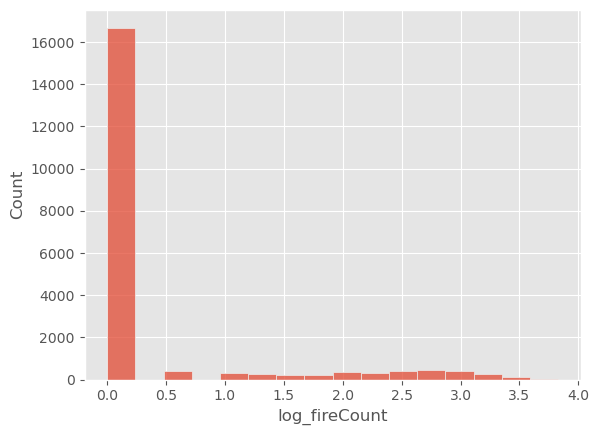

In [12]:
sns.histplot(x=gdf_acfi['log_fireCount'])
plt.show()

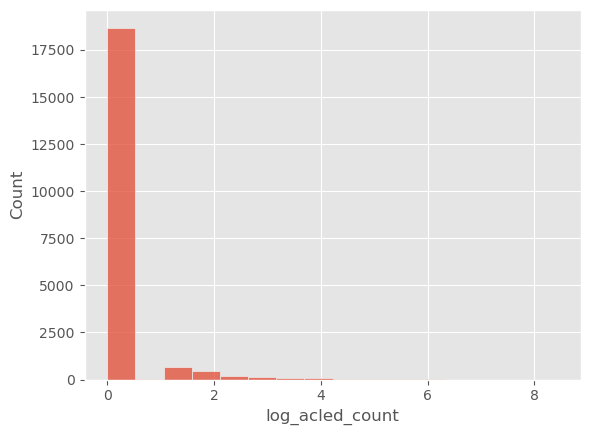

In [13]:
sns.histplot(x=gdf_acfi['log_acled_count'])
plt.show()

In [14]:
# Perform PooledOLS
from linearmodels import PooledOLS
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from linearmodels.panel import compare
import statsmodels.api as sm

from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

import scipy.stats as st
import statsmodels.graphics.tsaplots as tsap
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

## Step 1: Copy dataset and transform it into the right format.

In [15]:
def data_prep(data,col_list):
    data = data[column_list].copy()
    data = data.set_index(['grid_id', 'year'])
    years = data.index.get_level_values('year').to_list()
    data['year'] = pd.Categorical(years)
    return data

## Step 3: Check goodness of fit

In [16]:
def goodness_of_fit(model_name,residuals,x,y,exog_v):

    print('Mean value of residual errors='+str(residuals.mean()))

    # Plot Q-Q plot of the residual error to check normality 
    sm.qqplot(data=residuals, line='45')
    plt.show()

    # NORMALITY
    
    # Histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=50)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals')
    plt.show()

    # Jarque-Bera Test
    jb_test_stat, jb_p_value = jarque_bera(residuals)
    print(f"Jarque-Bera Test Statistic: {jb_test_stat}")
    print(f"p-value: {jb_p_value}")
    # Interpretation
    if jb_p_value < 0.05:
        print("The null hypothesis of normality is rejected. The data is not normally distributed.")
    else:
        print("The null hypothesis of normality is not rejected. The data is normally distributed.")

    # HETEROSKEDASITY
    
    #  Residual versus X - to check heteroskedasity  
    fig, ax = plt.subplots()
    fig.suptitle('Raw residuals of Pooled OLS versus X')
    plt.ylabel('Residual (y - mu)')
    plt.xlabel('X='+str(exog_v[0]))
    #ax.scatter(x[exog_vars[0]], residuals_pooled_OLS, s=4, c='black', label='Residual Error')
    ax.scatter(x[exog_v[0]], residuals, s=4, label='Residual Error')
    plt.show()

    # White Test
    white_test_results = het_white(residuals, x)
    labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
    white_test_r = dict(zip(labels, white_test_results))
    print(white_test_r)
    # Interpretation
    if white_test_results[1] < 0.05:
        print("The LM test’s p-value is < .001 indicating a rejection of the Null hypothesis of the White test that the residuals are homoskedastic.")
    else:
        print("The null hypothesis is not rejected. The data is normally homoskedastic.")

    #Are the residual errors correlated with the response variable y?
    fig, ax = plt.subplots()
    fig.suptitle('Raw residuals of Pooled OLS versus y')
    plt.ylabel('Residual (y - mu)')
    plt.xlabel('y')
    #ax.scatter(y, residuals_pooled_OLS, s=4, c='black', label='Residual Error')
    ax.scatter(y, residuals, s=4, label='Residual Error')
    plt.show()

    # Pearson's Test of Correation
    p_results = st.pearsonr(x=y, y=residuals)
    labels = ['Pearson\'s r:', 'p-value:']
    pearsons_test_r = dict(zip(labels, p_results))
    print('Results of the Pearson\'s r test of correlation between the residual errors and the response variable y ===>')
    #print(lzip(keys,results))
    print(pearsons_test_r)

    # Store Model Results
    goodnessoffit_performance.loc[len(goodnessoffit_performance.index)] = [model_name,residuals.mean(),jb_test_stat, jb_p_value,
                                                                   white_test_results[0],white_test_results[1],p_results[0],
                                                                  p_results[1]]
    

In [17]:
col_names = ['Regression Model','Mean Residual Errors','Jarque-Bera Test Statistic','Jarque-Bera Test p-value',
             'White Test Statistic','White Test p-value','Pearson\'s Test Statistic','Pearson\'s Test p-value']
goodnessoffit_performance = pd.DataFrame(columns=col_names)

## Model: Pooled OLS with Actual Data

The Pooled OLS regression model is often a good starting point and can act as a reference model. Our dependent (endogenous) and explanatory (exogenous) variables are as follows:

Dependent variable y = count of ACLED events in grids 
Explanatory variablexX  count of FIRMS fires in grids =

The Pooled OLS regression model equations as follows:

log_acled_count = beta_cap_1 * fireCount + beta_cap_0 + epsilon
** 

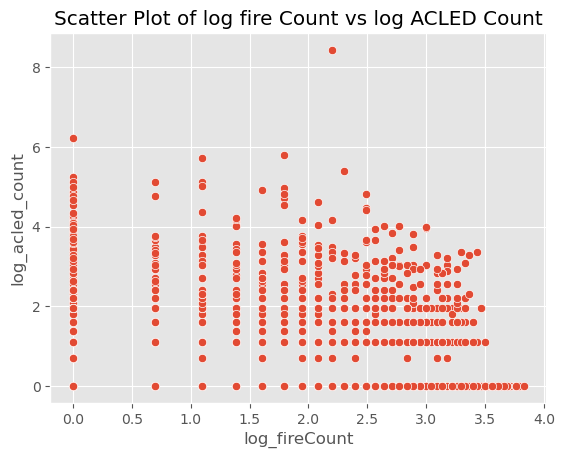

In [18]:
sns.scatterplot(x=gdf_acfi['log_fireCount'],  
                y=gdf_acfi['log_acled_count'])
                #hue=df_panel['COUNTRY']).set(title=                 
                #'Y-o-Y % Change in per-capita GDP versus Y-o-Y % Change in Gross capital formation')
# Set the title (optional)
plt.title('Scatter Plot of log fire Count vs log ACLED Count')



# Save the figure
plt.savefig('scatterplot_Log_Value.png', dpi=300, bbox_inches='tight')

plt.show()

The log values of acled count are linearly??? related to firecount across with scewness towards right. There are signs of heteroskedascity in the reponse variable, specifically as variance is not constant for differenct values fire count. This does not bode well for using OLS regression.

The objective of training the model on the panel data set is to find the fitted coefficients β_cap_1 and β_cap_0. The ‘cap’ in β_cap signifies that it is the value of the coefficient that the model has estimated and it not the true (population level) value β which is always unknown.

ε is the residual error of the fitted model and it is a random variable with a certain mean and variance. If the OLS estimation technique does its job correctly, ε will have a mean value of zero and ε will have a constant variance conditioned upon GCF_GWTH_PCNT (i.e. ε will not be heteroskedastic), and ε will not be auto-correlated. 

In [19]:
column_list = ['grid_id', 'year', 'log_fireCount', 'log_acled_count']

In [20]:
gdf_regression = data_prep(gdf_acfi,column_list)

In [21]:
#exog

exog_vars = ['log_fireCount','year']
#x = sm.add_constant(gdf_regression[exog_vars])
x = sm.tools.tools.add_constant(gdf_regression[exog_vars[0]]) 

#endog

y = gdf_regression['log_acled_count']                               

In [22]:
# MODEL RUN

model_POOLED = PooledOLS(y,x)
results_POOLED = model_POOLED.fit(cov_type='clustered', cluster_entity=True)
#results_POOLED = model_POOLED.fit(cov_type='robust')
#results_POOLED = model_POOLED.fit(cov_type='clustered', cluster_time=True)

# Store values for checking homoskedasticity graphically
fittedvals_POOLED = results_POOLED.predict().fitted_values
residuals_POOLED = results_POOLED.resids

In [23]:
print(results_POOLED)

                          PooledOLS Estimation Summary                          
Dep. Variable:        log_acled_count   R-squared:                        0.0215
Estimator:                  PooledOLS   R-squared (Between):              0.0472
No. Observations:               20400   R-squared (Within):              -0.0023
Date:                Tue, Aug 13 2024   R-squared (Overall):              0.0215
Time:                        06:51:54   Log-likelihood                -1.796e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      448.00
Entities:                         850   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                 F(1,20398)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             40.149
                            

**Analysis of goodness-of-fit via R-squared, F-test, Log-Likelihood and AIC**

The R-squared which measures the fraction of the total variance in y that is explained byxs is 007179 or about72 is very low..

The F-test for regression that measures the joint significance of the model’s parameters has produced a test statistic 652611.4 with a p-value 0-35 thereby leading us to conclude that the model’s coefficient estimates are jointly significant at a p < .001ures.

**Log-likelihood**

The Log-likelihood of the model is -1.743e+04. These goodness-of-fit values by themselves are meaningless unless we compare them to that of a competing model. In my next week’s article, we' ll a Fixed Effects model on the same data panel and use compare the quality of fit of the FE model with the Pooled OLSR model using these two measures.

Mean value of residual errors=-4.179663151530001e-18


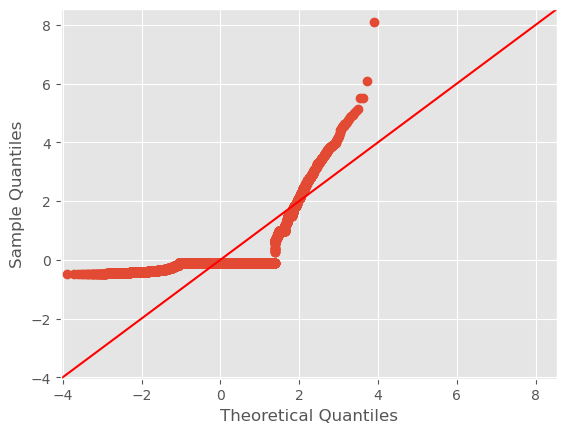

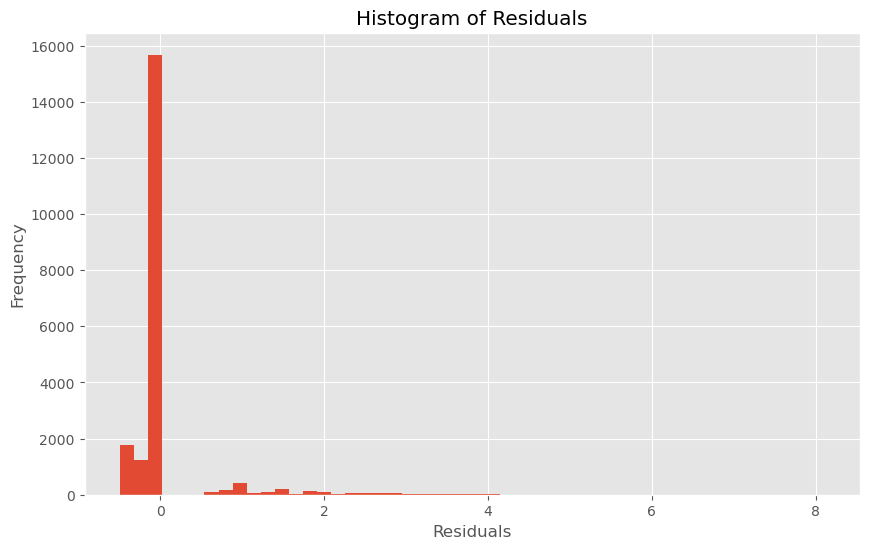

Jarque-Bera Test Statistic: 475209.9741381079
p-value: 0.0
The null hypothesis of normality is rejected. The data is not normally distributed.


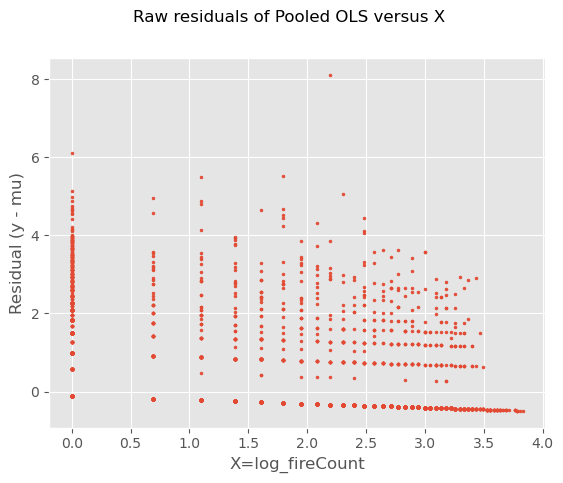

{'LM-Stat': 330.9742428497788, 'LM p-val': 1.3485167310568953e-72, 'F-Stat': 168.1915632850722, 'F p-val': 3.55721085506554e-73}
The LM test’s p-value is < .001 indicating a rejection of the Null hypothesis of the White test that the residuals are homoskedastic.


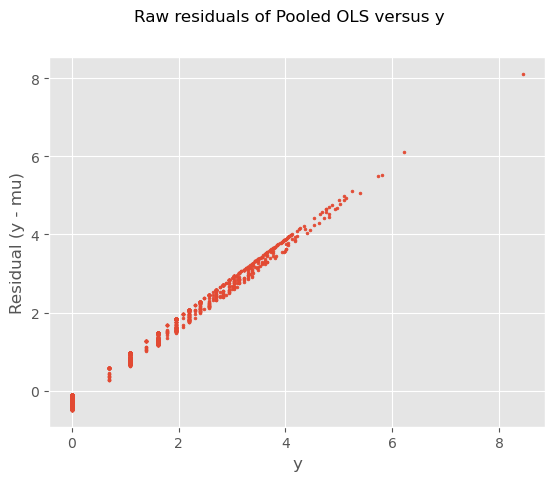

Results of the Pearson's r test of correlation between the residual errors and the response variable y ===>
{"Pearson's r:": 0.9891962559588771, 'p-value:': 0.0}


In [24]:
# Check Goodness of fit
goodness_of_fit('POOLED',residuals_POOLED,x,y,exog_vars)

In [25]:
goodnessoffit_performance

,Regression Model,Mean Residual Errors,Jarque-Bera Test Statistic,Jarque-Bera Test p-value,White Test Statistic,White Test p-value,Pearson's Test Statistic,Pearson's Test p-value
0,POOLED,-0.0000,"475,209.9741",0.0000,330.9742,0.0000,0.9892,0.0000


**Analysis of residual errors**

Let’s analyze the residual errors of the fitted model for **normality, heteroskedasticity and correlation** — the three properties that impact the goodness-of-fit of the linear model.

The mean is practically zero which is the expected outcome of using the OLS estimation technique.

**normality**

Here is where we observe the first sign of a problem. The Q-Q plot of the residuals is a visual test of normality and it clearly shows that the residuals of the fitted model are not normally distributed. If the data is not normally distributed, the points will deviate from the reference line.

Even though the residual errors are not normally distributed, the Pooled OLS estimator is still the Best Linear Unbiased Estimator (BLUE) for the panel data regression problem. Non-normality of residual errors does not affect the BLUE-ness of OLS regression model.

One disadvantage of having residual errors that are not normally distributed is that one cannot build reliable confidence intervals for the model’s predictions. We can tolerate small departures from normality but large departures invalidate the use of either the Normal or the Student’s t-distributions. Consequently, reliable confidence intervals cannot (and therefore should not) be calculate

**heteroskedasticity**

The OLS estimator is not efficient (although it’s still unbiased) if the residual errors of the OLSR model are heteroskedastic, i.e. the variance of residual errors is not constant across all values of X.

When the residuals are heteroskedastic, the OLS estimator becomes inefficient i.e. it loses the ability to generate predictions having the lowest possible variance amongst all possible linear unbiased estimators. When the residuals are heteroskedastic, the OLS estimator will under or over-estimate the variance in the parameter estimates, causing the standard errors of the parameter estimates to be miss-specified. Since standard errors are used for calculating confidence intervals, the confidence intervals of the parameter estimates also become incorrect. The same kind of miss-specification is seen for the standard errors and confidence intervals associated with the model’s predictions.

**correlation**

There seems to be what looks like a linear trend between the residual errors and y. A correlation test using Pearson’s r confirms this visual judgement:
The first value of 0.61499 is the amount of correlation (~ 61%) seen between the residuals and y, and the second value of 3.99645e-18 is the p-value of the result. We will ignore the reported p-value as we know that the residuals are far from being normally distributed. At any rate, the reported correlation (61%) by itself is obviously much greater than zero and therefore, significant.

The high degree of correlation between the residual errors of regression and the response variable indicate that our Pooled OLSR model is missing importan**t explanatory variabl**es which would have otherwise been able to “explain” some of this correlation. Whatever variance in the (y) y thae (Xhas s not been able to explain has leaked into the residuals in the form of both a correlation with y, and heteroskedasticit

Ref: https://medium.com/towards-data-science/how-to-build-a-pooled-ols-regression-model-for-panel-data-sets-a78358f9c2a


---------------------------------------------

Simple OLS requires that there is no correlation between unobserved, independent variable(s) and the IVs (i.e. exogeneity). Let´s write this down: 

Ref: https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8y
y = m1x1 + m2x2 +c
x1, x2 - observered IV - ideaally x1 and x2 should be uncorrelated 

y = m1x1 + n1z1 + c

x1 - observed IV
z1 - un observed IV

-----------------------------------------
.c2a




## Fixed Effect Model

Ref: https://towardsdatascience.com/understanding-the-fixed-effects-regression-model-d2fccc2cc27e

The Fixed Effects regression model is used to estimate the effect of intrinsic characteristics of individuals in a panel data set. Examples of such intrinsic characteristics are genetics, acumen and cultural factors. Such factors are not directly observable or measurable but one needs to find a way to estimate their effects since leaving them out leads to a sub-optimally trained regression model. The Fixed Effects model is designed to address this problem.

we can express the general form of the linear regression model

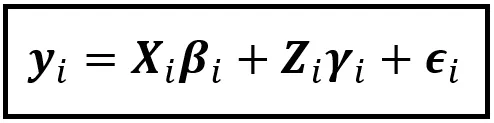

In the above equation:

y_i is a matrix of size [T x 1] containing the T observations for country i.
X_i is a matrix of size [T x k] containing the values of k regression variables all of which are observable and relevant.
β_i is a matrix of size [k x 1] containing the population (true)values of regression coefficients for the k regression variables.
Z_i is a matrix of size [T x m] containing the (theoretical) values of all the variables (m in number) and effects that cannot be directly observed.
γ_i is a matrix of size [m x 1] containing the (theoretical) population values of regression coefficients for the m unobservable variables.
ε_i is a matrix of size [T x 1] containing the errors corresponding to the T observations for cou

All unit-specific effects are assumed to be introduced by the term Z_iγ_i. The matrix Z_i and its coefficients vector γ_i are purely theoretical terms since what they represent cannot be in reality observed and measured.
Since z_i is not directly observable, in order to measure the effects of z_i, we need to formalize the effect of leaving out z_i. Fortunately, there is a well-studied concept in statistics called the omitted-variable bias which we can use for this purpose.

Omitted variable bias
While training the model on the panel data set, if we leave out z_i from the model, it will cause what is known as the omitted variable bias. It can be shown that if the regression model is estimated without considering z_i, then the estimated values β_cap_i of the coefficients β_i will be biased as follo

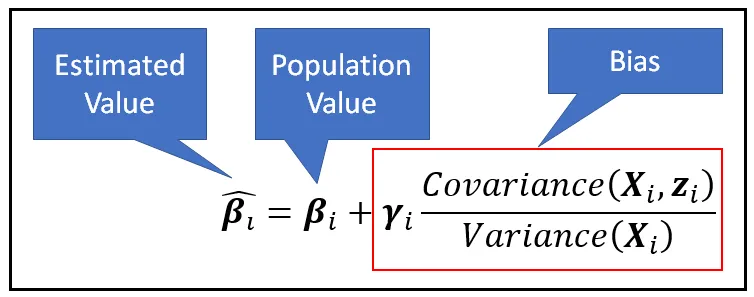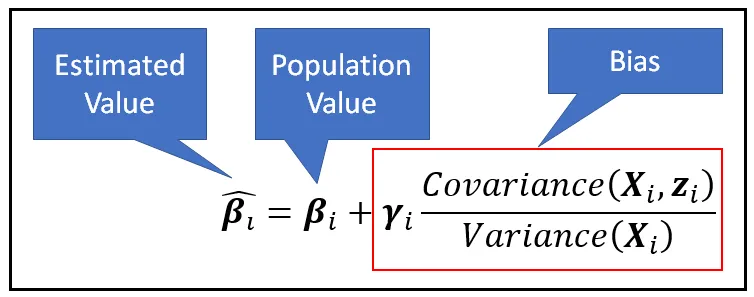

The above equation suggests an approach for constructing the following two kinds of models — the Fixed Effects model, and the Random Effects model depending on whether or not the Covariance term in the above equation is zero, i.e. whether or not the unobservable effects z_i are correlated with the regression variables.
The Fixed Effects Regression Model

In this model, we assume that the unobservable individual effects z_i are correlated with the regression variables. In effect, it means that the Covariance(X_i, z_i) in the above equation is non-zero

we also assume that the bias introduced due to the omission of the unit-specific factors is group-specific.

To compensate for this bias, we will introduce a group-specific intercept called c_i into the model. c_i is assumed to act in a direction that is opposite (in a vector sense) to the effect of the omitted-variable bias.

With these two assumptions in place, we will express the Fixed Effects regression model’s equation as foll

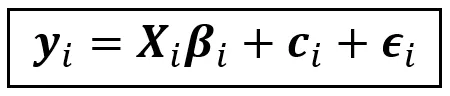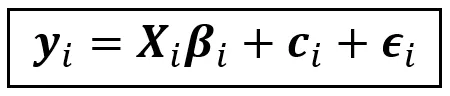ows:.

ws:
ntry i.

In [26]:
column_list = ['grid_id','year','log_fireCount', 'log_acled_count']

In [27]:
gdf_regression = data_prep(gdf_acfi,column_list)

In [28]:
#exog

exog_vars = ['log_fireCount','year']
#x = sm.add_constant(gdf_regression[exog_vars])
x = sm.tools.tools.add_constant(gdf_regression[exog_vars[0]]) 

#endog

y = gdf_regression['log_acled_count']                               

In [29]:
# Run the fixed effects model
#model_FE = PanelOLS(y, x) - same as PooledOLS

model_FE_ET = PanelOLS(y, x, entity_effects=True, time_effects=True)
results_FE_ET = model_FE_ET.fit(use_lsdv = True)

model_FE_E = PanelOLS(y, x, entity_effects=True, time_effects=False)
results_FE_E = model_FE_E.fit(use_lsdv = True)

model_FE_T = PanelOLS(y, x, entity_effects=False, time_effects=True)
results_FE_T = model_FE_T.fit(use_lsdv = True)

In [30]:
#Compare Results
print(compare({'Fixed Effect_ET': results_FE_ET, 'Fixed Effect_E': results_FE_E, 'Fixed Effect_T': results_FE_T}))

                                  Model Comparison                                 
                            Fixed Effect_ET      Fixed Effect_E      Fixed Effect_T
-----------------------------------------------------------------------------------
Dep. Variable               log_acled_count     log_acled_count     log_acled_count
Estimator                          PanelOLS            PanelOLS            PanelOLS
No. Observations                      20400               20400               20400
Cov. Est.                        Unadjusted          Unadjusted          Unadjusted
R-squared                            0.0007              0.0011              0.0214
R-Squared (Within)                   0.0010              0.0011             -0.0022
R-Squared (Between)                  0.0201              0.0253              0.0470
R-Squared (Overall)                  0.0102              0.0127              0.0215
F-statistic                          12.869              21.415             

The results you provided summarize the output of three different fixed-effect regressions on panel data. Each regression model explains the logged count of ACLED events (`log_acled_count`) using the logged count of fire incidents (`log_fireCount`) as the independent variabAle. Here’s a breakdown of the results:

### 1. **Model Comparison Overview**
   - **Dep. Variable**: The dependent variable for all models is `log_acled_count`.
   - **Estimator**: All models use the PanelOLS (Panel Ordinary Least Squares) estimator with fixed effects.
   - **No. Observations**: Each model includes 20,400 observations.
   - **Cov. Est.**: The covariance matrix is unadjusted in all models.

### 2. **Different Models**
   - **Fixed Effect_ET (Entity-Time Fixed Effects)**
     - **Fixed Effect_E (Entity Fixed Effects)**
     - **Fixed Effect_T (Time Fixed Effects)**

### 3. **Key Metrics**
   - **R-squared**: Measures the proportion of variance in the dependent variable explained by the independent variables.
     - **R-squared** values are relatively low across all models, indicating that `log_fireCount` does not explain much of the variation in `log_acled_count`.
   - **R-Squared (Within)**: Represents the variation explained within entities or time periods.
     - Similar low values for all models, suggesting little within-variation is captured.
   - **R-Squared (Between)**: Measures the variation between entities or time periods.
     - Higher in the **Fixed Effect_T** model, indicating better performance in explaining differences across time.
   - **R-Squared (Overall)**: A combination of within and between R-squared.
     - Slightly higher in the **Fixed Effect_T** model, which suggests this model explains a bit more of the overall variation in the data.
   - **F-statistic**: Tests the joint significance of all coefficients.
     - All models show highly significant F-statistics (p-value = 0.0000), meaning that at least some of the coefficients are significantly different from zero.

### 4. **Coefficient Estimates**
   - **const (Intercept)**: The constant term varies slightly across models.
     - Positive and statistically significant, indicating a positive baseline value for `log_acled_count` when `log_fireCount` is zero.
   - **log_fireCount**: The main variable of interest.
     - The coefficient is positive across all models, meaning that an increase in fire incidents is associated with an increase in ACLED events.
     - The magnitude of the effect is smallest in the **Fixed Effect_ET** model (0.0530) and largest in the **Fixed Effect_T** model (0.1117).
     - All coefficients are statistically significant, as indicated by the high t-statistics (values in parentheses).

### 5. **Interpretation of Fixed Effects**
   - **Fixed Effect_ET**: This model controls for both entity (e.g., country, region) and time (e.g., year, month) fixed effects.
     - Captures any unobserved factors that vary across both entities and time.
   - **Fixed Effect_E**: This model controls for entity fixed effects only.
     - Accounts for unobserved characteristics that vary across entities but are constant over time.
   - **Fixed Effect_T**: This model controls for time fixed effects only.
     - Accounts for factors that vary across time but are constant across entities.

### **Summary**
- The **Fixed Effect_T** model appears to explain slightly more variation overall than the other models, particularly in capturing time-specific variations.
- The association between `log_fireCount` and `log_acled_count` is positive and significant across all models, but the strength of this association varies depending on the type of fixed effects used.
- The **Fixed Effect_ET** model has the smallest coefficient for `log_fireCount`, suggesting that when controlling for both entity and time, the impact of fire incidents on ACLED events is smaller.

**Clustering on entity reduced the t-stats across the board. This suggests there is important correlation in the residuals per entity. Clustering by both also decreases the t-stats which suggests that there is cross-sectional dependence in the data. Note: clustering by entity addresses correlation across time and clustering by time controls for correlation between entities in a time period.**

**In the provided regression results, the t-statistic for log_fireCount is 30.117 in the Fixed Effect_T model. This very high value indicates that the effect of log_fireCount on log_acled_count is highly significant and unlikely to be due to random chance.**

**In the Fixed Effect_ET model, the t-statistic for log_fireCount is 7.4377, which, while still significant, is much lower than in the other models. This suggests that the confidence in the effect of log_fireCount on log_acled_count is somewhat weaker in this model compared to the others.**

Ref: https://bashtage.github.io/linearmodels/panel/examples/examples.html
---------------------
General Thresholds for t-Statistics
t-statistic > 2 or < -2: Typically indicates statistical significance at the 5% level, implying strong evidence against the null hypothesis.
t-statistic close to 0: Suggests that the coefficient is not significantly different from zero, indicating little to no effect.
t-statistic between 1.5 and 2: May be considered marginally significant, depending on the context and field of study.
---------------------




In [31]:

# Store values for checking homoskedasticity graphically
fittedvals_FE = results_FE_ET.predict().fitted_values
residuals_FE = results_FE_ET.resids

In [32]:
# Print the summary of the results - entity effect
print(results_FE_ET)

                          PanelOLS Estimation Summary                           
Dep. Variable:        log_acled_count   R-squared:                        0.0007
Estimator:                   PanelOLS   R-squared (Between):              0.0201
No. Observations:               20400   R-squared (Within):               0.0010
Date:                Tue, Aug 13 2024   R-squared (Overall):              0.0102
Time:                        06:52:07   Log-likelihood                -1.087e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      12.869
Entities:                         850   P-value                           0.0003
Avg Obs:                       24.000   Distribution:                 F(1,19526)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             12.869
                            

Mean value of residual errors=-1.3932210505100003e-18


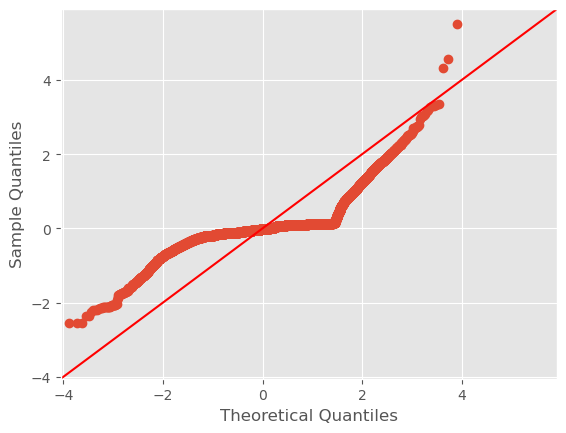

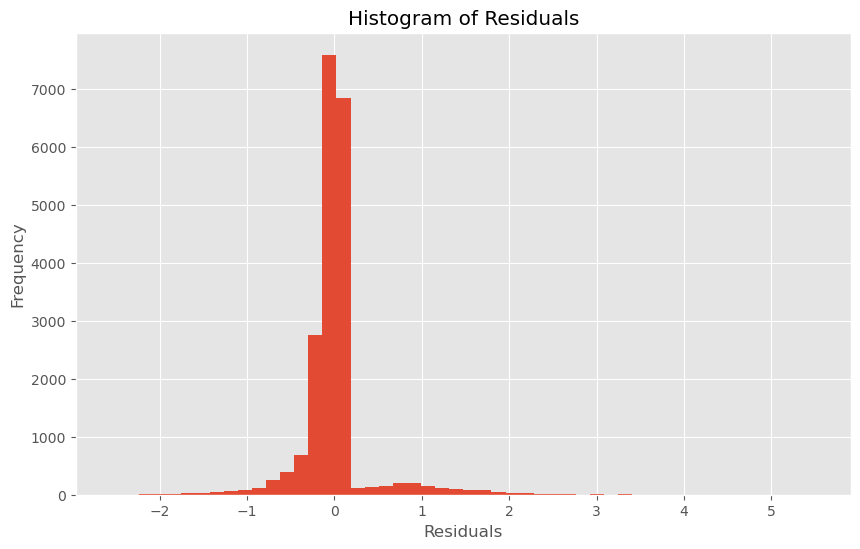

Jarque-Bera Test Statistic: 193651.86640953404
p-value: 0.0
The null hypothesis of normality is rejected. The data is not normally distributed.


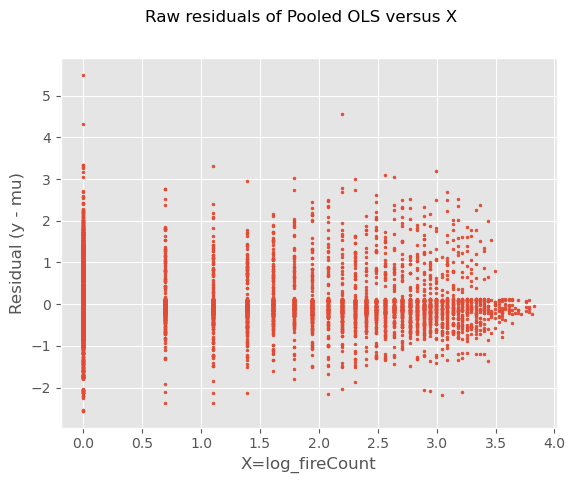

{'LM-Stat': 530.0158031501313, 'LM p-val': 8.10085176435947e-116, 'F-Stat': 272.0367623283547, 'F p-val': 2.536077961458453e-117}
The LM test’s p-value is < .001 indicating a rejection of the Null hypothesis of the White test that the residuals are homoskedastic.


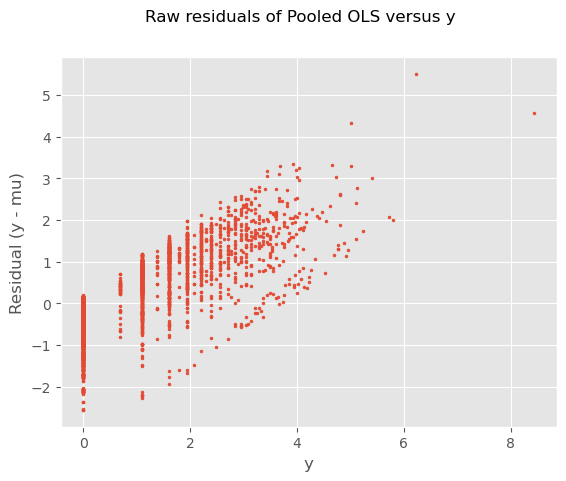

Results of the Pearson's r test of correlation between the residual errors and the response variable y ===>
{"Pearson's r:": 0.6988133524500075, 'p-value:': 0.0}


In [33]:
goodness_of_fit('Fixed Effect',residuals_FE,x,y,exog_vars)

In [34]:
goodnessoffit_performance

,Regression Model,Mean Residual Errors,Jarque-Bera Test Statistic,Jarque-Bera Test p-value,White Test Statistic,White Test p-value,Pearson's Test Statistic,Pearson's Test p-value
0,POOLED,-0.0000,"475,209.9741",0.0000,330.9742,0.0000,0.9892,0.0000
1,Fixed Effect,-0.0000,"193,651.8664",0.0000,530.0158,0.0000,0.6988,0.0000


## Random Effect Model

In [35]:
# Random Effects odel
model_RE = RandomEffects(y,x) 
results_RE = model_RE.fit() 

# Store values for checking homoskedasticity graphically
fittedvals_RE = results_RE.predict().fitted_values
residuals_RE = results_RE.resids

In [36]:
# Print the summary of the results - entity effect
print(results_RE)

                        RandomEffects Estimation Summary                        
Dep. Variable:        log_acled_count   R-squared:                        0.0023
Estimator:              RandomEffects   R-squared (Between):              0.0321
No. Observations:               20400   R-squared (Within):               0.0010
Date:                Tue, Aug 13 2024   R-squared (Overall):              0.0159
Time:                        06:52:14   Log-likelihood                -1.193e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      47.236
Entities:                         850   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                 F(1,20398)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             47.236
                            

Mean value of residual errors=4.876273676785001e-18


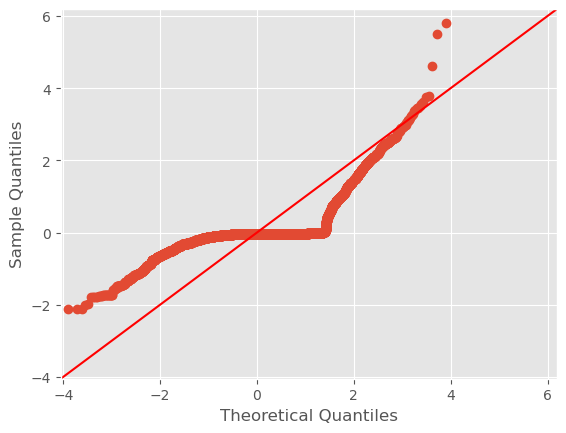

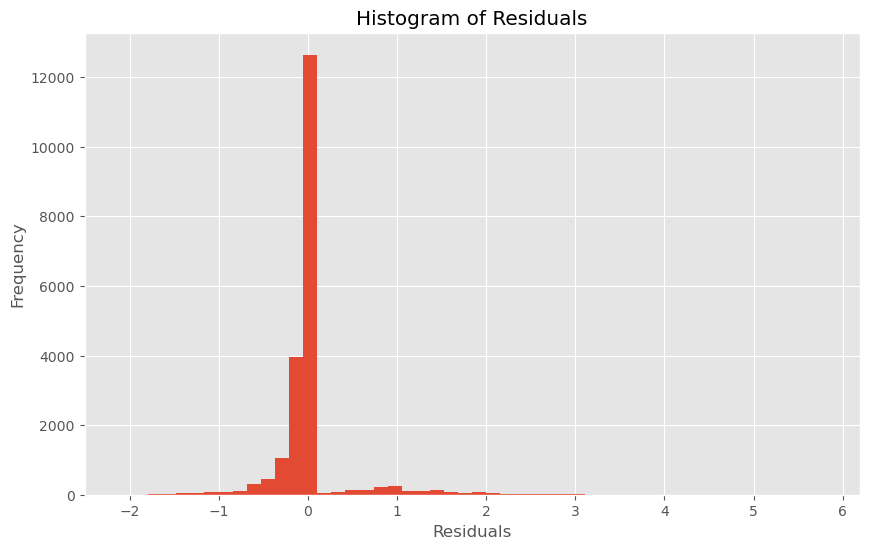

Jarque-Bera Test Statistic: 297229.36700037814
p-value: 0.0
The null hypothesis of normality is rejected. The data is not normally distributed.


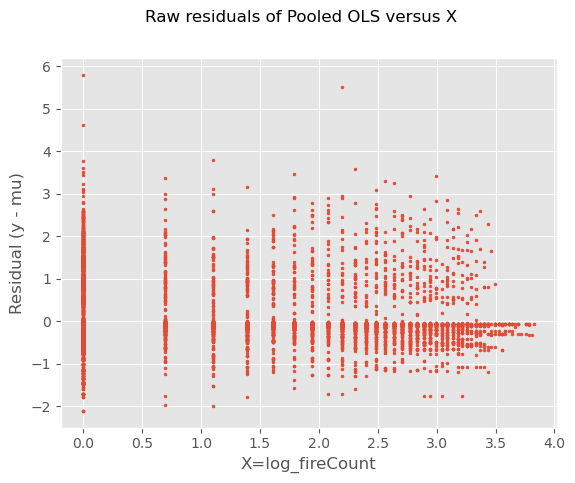

{'LM-Stat': 525.7305365842316, 'LM p-val': 6.903423183977418e-115, 'F-Stat': 269.77911752801555, 'F p-val': 2.2870421495011899e-116}
The LM test’s p-value is < .001 indicating a rejection of the Null hypothesis of the White test that the residuals are homoskedastic.


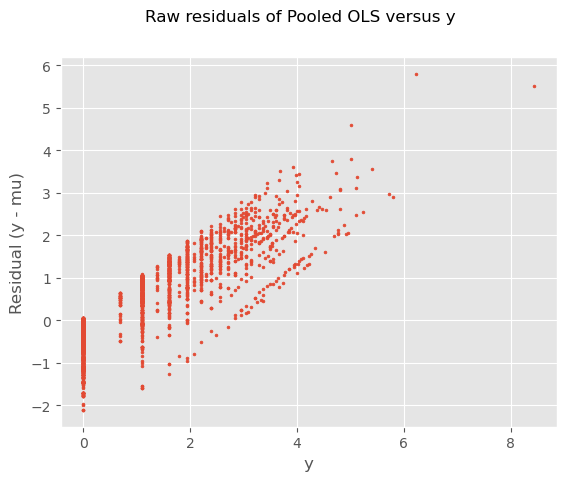

Results of the Pearson's r test of correlation between the residual errors and the response variable y ===>
{"Pearson's r:": 0.8462916476727365, 'p-value:': 0.0}


In [37]:
goodness_of_fit('Random Effects',residuals_RE,x,y,exog_vars)

In [38]:
goodnessoffit_performance

,Regression Model,Mean Residual Errors,Jarque-Bera Test Statistic,Jarque-Bera Test p-value,White Test Statistic,White Test p-value,Pearson's Test Statistic,Pearson's Test p-value
0,POOLED,-0.0000,"475,209.9741",0.0000,330.9742,0.0000,0.9892,0.0000
1,Fixed Effect,-0.0000,"193,651.8664",0.0000,530.0158,0.0000,0.6988,0.0000
2,Random Effects,0.0000,"297,229.3670",0.0000,525.7305,0.0000,0.8463,0.0000


In [39]:
from linearmodels.panel import compare

print(compare({'POOLED': results_POOLED, 'Fixed Effect': results_FE_ET, 'Random Effects': results_RE}))

                                  Model Comparison                                 
                                     POOLED        Fixed Effect      Random Effects
-----------------------------------------------------------------------------------
Dep. Variable               log_acled_count     log_acled_count     log_acled_count
Estimator                         PooledOLS            PanelOLS       RandomEffects
No. Observations                      20400               20400               20400
Cov. Est.                         Clustered          Unadjusted          Unadjusted
R-squared                            0.0215              0.0007              0.0023
R-Squared (Within)                  -0.0023              0.0010              0.0010
R-Squared (Between)                  0.0472              0.0201              0.0321
R-Squared (Overall)                  0.0215              0.0102              0.0159
F-statistic                          448.00              12.869             

The results you provided compare three different regression models for analyzing the relationship between the logged count of ACLED events (`log_acled_count`) and the logged count of fire incidents (`log_fireCount`). The models are **Pooled OLS**, **Fixed Effects (Entity and Time)**, and **Random Effects**. Here’s an interpretation of the results:

### 1. **Model Overview**

- **Pooled OLS**: This model assumes that there are no individual-specific effects or time-specific effects. It treats the data as if it were a single large cross-sectional dataset, ignoring any panel structure.
  
- **Fixed Effects (Entity and Time)**: This model controls for unobserved heterogeneity by allowing for individual-specific (entity) and time-specific fixed effects. It captures the effects that vary across entities and over time but are constant within an entity or time period.

- **Random Effects**: This model assumes that the individual-specific effects are random and uncorrelated with the independent variables. It allows for variation across entities but assumes that these variations are randomly distributed.

### 2. **Key Metrics Interpretation**

- **No. Observations**: All models use the same dataset with 20,400 observations.

- **Cov. Est. (Covariance Estimator)**:
  - **Pooled OLS**: Uses a clustered covariance estimator, likely clustered at the entity level, to account for potential within-entity correlation.
  - **Fixed Effects and Random Effects**: Use unadjusted covariance estimators.

- **R-squared**: 
  - **Pooled OLS (0.0440)**: Indicates that approximately 4.4% of the variation in `log_acled_count` is explained by `log_fireCount`.
  - **Fixed Effects (0.0028)**: Much lower R-squared, indicating that the model explains very little of the variation in the dependent variable when entity and time effects are controlled for.
  - **Random Effects (0.0090)**: Better than Fixed Effects but still explains only a small portion of the variation.

- **R-Squared (Within, Between, Overall)**:
  - **Within**: Measures variation explained within entities over time.
    - Highest for the **Random Effects** model (0.0057), suggesting it slightly better captures within-entity variation compared to the others.
  - **Between**: Measures variation explained between entities.
    - **Pooled OLS (0.0869)**: Performs best here, indicating it captures between-entity differences well.
  - **Overall**: Combination of within and between R-squared.
    - **Pooled OLS (0.0440)**: Again, performs best overall.

- **F-statistic and P-value**:
  - All models have a significant F-statistic (p-value = 0.0000), indicating that the model as a whole is statistically significant.
  - **Pooled OLS (F = 938.60)**: Strongest model fit according to the F-statistic.
  - **Fixed Effects (F = 55.319)**: Significantly lower, indicating that this model has a weaker overall fit when controlling for entity and time effects.
  - **Random Effects (F = 185.29)**: Moderate fit compared to the others.

### 3. **Coefficient Estimates and t-Statistics**

- **const (Intercept)**:
  - **Pooled OLS (0.0736, t = 7.1226)**: Significant and positive, indicating a baseline level of ACLED events when `log_fireCount` is zero.
  - **Fixed Effects (0.1193, t = 19.745)**: Higher intercept, significant as well, suggesting the model estimates a higher baseline with fixed effects.
  - **Random Effects (0.0950, t = 6.6849)**: Intercept is between the other two models, also significant.

- **log_fireCount**:
  - **Pooled OLS (0.1148, t = 9.2856)**: Suggests a 10% increase in fire incidents is associated with an approximately 1.15% increase in ACLED events. The t-statistic is high, indicating strong statistical significance.
  - **Fixed Effects (0.0530, t = 7.4377)**: The effect size is smaller, with a 10% increase in fire incidents associated with only a 0.53% increase in ACLED events. The t-statistic is still significant but lower than in Pooled OLS.
  - **Random Effects (0.0858, t = 13.612)**: The effect size is in between the other two models, with a 10% increase in fire incidents leading to an 0.86% increase in ACLED events. The t-statistic is higher than in the other models, indicating strong significance.

### **Summary and Model Comparison**

- **Pooled OLS**: This model shows the highest R-squared and F-statistic, suggesting it explains more variation overall. However, it does not account for entity-specific or time-specific effects, which can lead to biased estimates if such effects are present.

- **Fixed Effects**: This model accounts for unobserved heterogeneity across entities and time but results in a much lower R-squared and a smaller coefficient for `log_fireCount`. This suggests that when controlling for these effects, the relationship between fire incidents and ACLED events is weaker.

- **Random Effects**: This model strikes a balance between the other two, showing moderate R-squared values and a significant effect of `log_fireCount`. It assumes the entity effects are random and not correlated with the independent variables, which may or may not be a valid assumption depending on the data.

In choosing between these models:
- **If you believe there are unobserved factors specific to entities or time periods that might bias the results**, the **Fixed Effects** model is preferable despite its lower explanatory power.
- **If the random effects assumption is valid (uncorrelated with independent variables)**, the **Random Effects** model might offer a good compromise between bias and efficiency.
- **If the panel structure is not important or if there's confidence that there's no significant unobserved heterogeneity**, the **Pooled OLS** model offers a simple and strong overall fit.

Choosing between PooledOLS and FE/RE: Basically, there are five assumptions for simple linear regression models that must be fulfilled. Two of them can help us in choosing between PooledOLS and FE/RE.

These assumptions are (1) Linearity, (2) Exogeneity, (3a) Homoskedasticity and (3b) Non-autocorrelation, (4) Independent variables are not Stochastic and (5) No Multicolinearity.

If assumption (2) or (3) (or both) are violated, then FE or RE might be more suitable.

I would recommend to start performing PooledOLS. Since it can be seen as a simple OLS model, it has to fulfill certain assumptions (those in the chapter “How to decide which Model is appropriate?” ). As stated above, if condition 2 or 3 (or both) are violated, then FE-/RE-models are likely more suitable. Since condition 2 can only be tested further down with the Hausman-Test, we will stick to proving condition 3 for now.



Check condition 3:

Condition 3 is splitted in 3a (Homoskedasticity) and 3b (Non-Autocorrelation). Those assumptions can be tested with a number of different tests. For condition 3a, I will show you how to identify heteroscedasticity graphically as well as perform the White-Test and Breusch-Pagan-Test (both are similar). For condition 3b, I will show you the Durbin-Watson-Test.

Basically, a residuals-plot represents predicted values (x-axis) vs. residuals (y-axis). If the plotted data points spread out, this is an indicator for growing variance and thus, for heteroskedasticity. Since this seems to be the case in our example, we might have the first violation. But let´s check this with the White- and the Breusch-Pagan-Test:



In simple terms, if p < 0.05, then heteroskedasticity is indicated. Both tests give very small p-values (White-test: 3.442621728589391e-44, Breusch-Pagan-test: 6.032616972194746e-2


** In our case p > 0.05, h heteroskedasticity is not indicated  **



In [ ]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

The Durbin-Watson-Test will have one output between 0 – 4. The mean (= 2) would indicate that there is no autocorrelation identified, 0 – 2 means positive autocorrelation (the nearer to zero the higher the correlation), and 2 – 4 means negative autocorrelation (the nearer to four the higher the correlation).

In our case the result is 1.7086665034473183, which clearly indicates weak positive autocorrelation or no autocorrelation. This may be due to presence of anonymous fires in the data. If we can remove anonymous fires - it may help us improving the coorelation.